In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
# Pozostawienie jedynie określonych kolumn
mpg = pd.read_csv('Dane/samochody.csv', usecols = ['spalanie', 'masa', 'moc', 'pochodzenie', 'liczba.cylindrów'])
mpg.head()

,spalanie,liczba.cylindrów,moc,masa,pochodzenie
0,18.0,8,130,3504,USA
1,15.0,8,165,3693,USA
2,18.0,8,150,3436,USA
3,16.0,8,150,3433,USA
4,17.0,8,140,3449,USA


In [3]:
# Statystyki opisowe
mpg.describe()

,spalanie,liczba.cylindrów,moc,masa
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [4]:
# tabela częstości
pd.crosstab(index=mpg['pochodzenie'], columns='count')

col_0,count
pochodzenie,
Azja,79
Europa,68
USA,245


In [5]:
# dwukierunkowa tabela częstości
pd.crosstab(index=mpg['pochodzenie'], columns=mpg['liczba.cylindrów'])

liczba.cylindrów,3,4,5,6,8
pochodzenie,,,,,
Azja,4,69,0,6,0
Europa,0,61,3,4,0
USA,0,69,0,73,103


In [6]:
# Statystyki opisowe w grupach
mpg.groupby('pochodzenie').describe()['spalanie']

,count,mean,std,min,25%,50%,75%,max
pochodzenie,,,,,,,,
Azja,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europa,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
USA,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0


Text(13.819444444444445, 0.5, 'Liczba obserwacji')

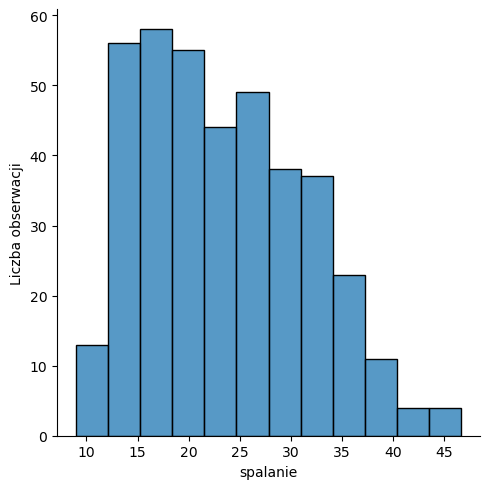

In [7]:
# Histogram mpg
sns.displot(data=mpg, x='spalanie')
plt.ylabel('Liczba obserwacji')

<Axes: xlabel='pochodzenie', ylabel='spalanie'>

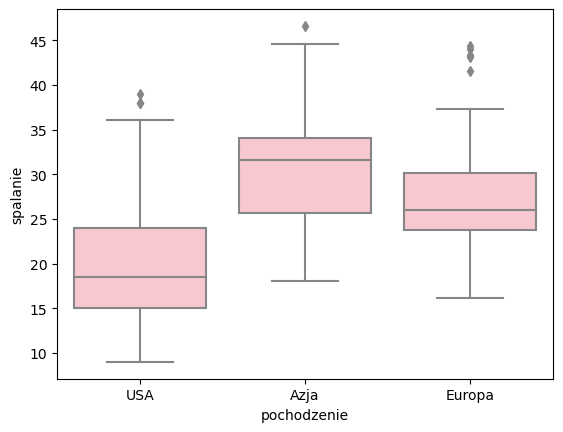

In [8]:
# Wykres pudełkowy spalania w zależności od pochodzenia
sns.boxplot(x='pochodzenie', y='spalanie', data=mpg, color='pink')

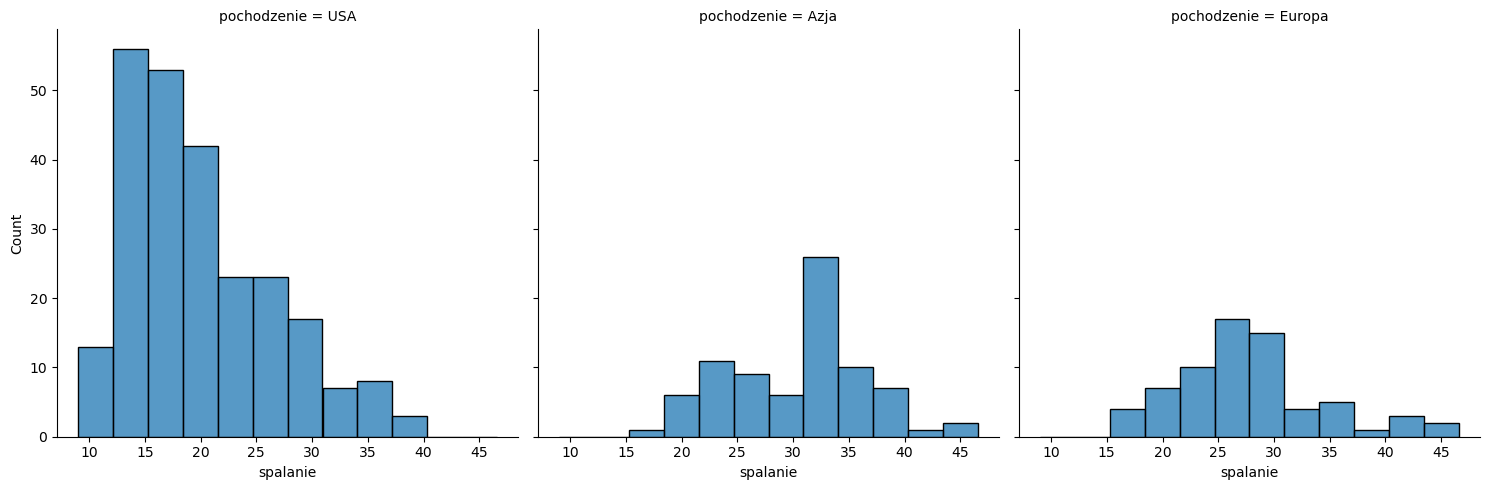

In [9]:
# Histogramy prezentujące rozkład spalania w zależności od pochodzenia
sns.displot(data=mpg, x='spalanie', col='pochodzenie')
# plt.savefig('r133.tiff', dpi=300)

In [10]:
# Rozdział obserwacji na osobne ramki
usa_cars = mpg[mpg['pochodzenie']=='USA']
europe_cars = mpg[mpg['pochodzenie']=='Europa']

In [11]:
# Test t-Studenta
stats.ttest_ind(usa_cars['spalanie'], europe_cars['spalanie'])

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

In [12]:
# Macierz korelacji
mpg[['spalanie','moc','masa']].corr()

,spalanie,moc,masa
spalanie,1.000000,-0.778427,-0.832244
moc,-0.778427,1.000000,0.864538
masa,-0.832244,0.864538,1.000000


Text(0.5, 1.0, 'Związek masy ze spalaniem')

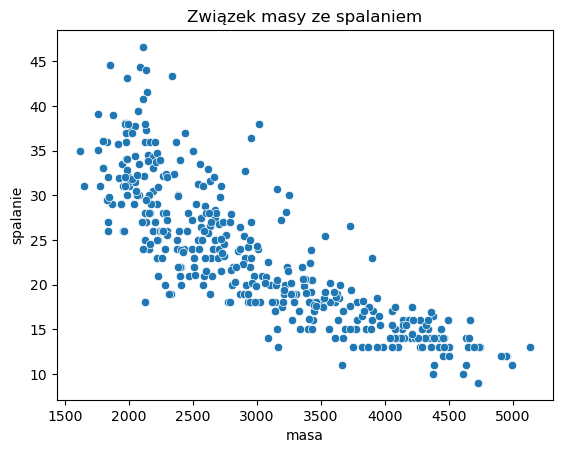

In [13]:
# Wykres punktowy spalania w zależności od masy z tytułem
sns.scatterplot(x='masa', y='spalanie', data=mpg)
plt.title('Związek masy ze spalaniem')
# plt.savefig('r134.tiff', dpi=300)

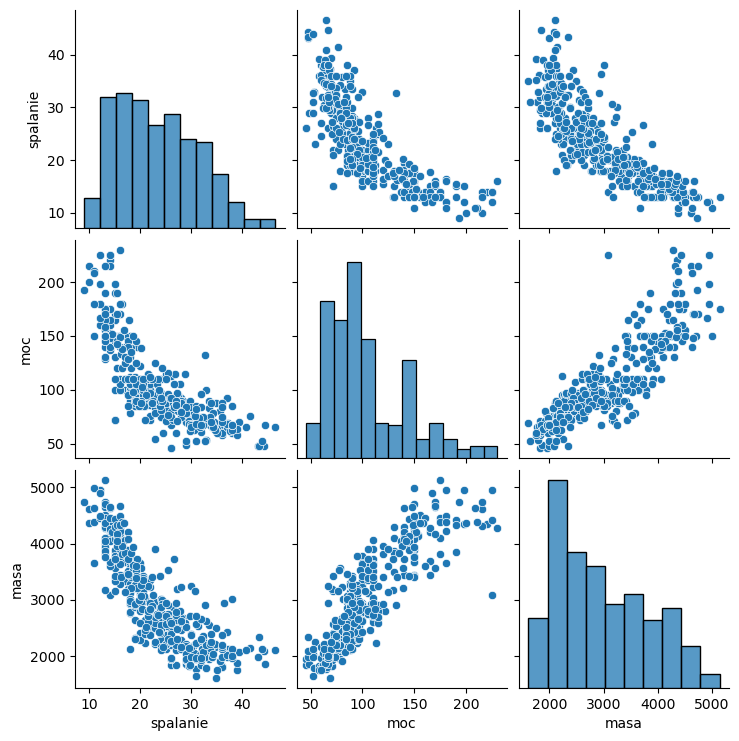

In [14]:
# Wykresy rozrzutu dla wszystkich par zmiennych z naszego zbioru danych
sns.pairplot(mpg[['spalanie','moc','masa']])
# plt.savefig('r135.tiff', dpi=300)

In [15]:
# Regresja liniowa — spalanie w funkcji masy
stats.linregress(x=mpg['masa'], y=mpg['spalanie'])

LinregressResult(slope=-0.007647342535779581, intercept=46.21652454901758, rvalue=-0.8322442148315755, pvalue=6.015296051435213e-102, stderr=0.00025796327827343175, intercept_stderr=0.7986724633128346)

Text(0.5, 1.0, 'Związek spalania z masą')

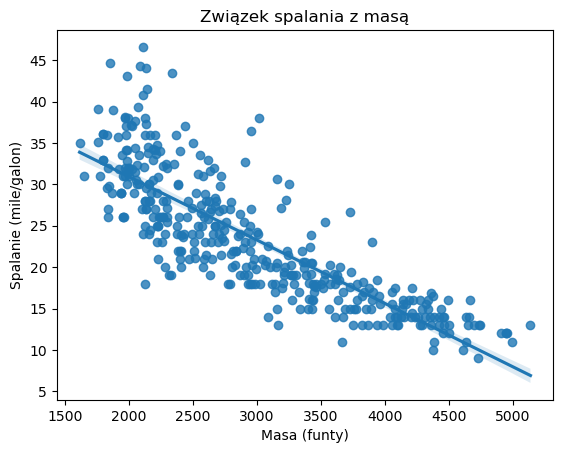

In [16]:
# Wykres rozrzutu z linią regresji spalania względem masy
sns.regplot(x="masa", y="spalanie", data=mpg)
plt.xlabel('Masa (funty)')
plt.ylabel('Spalanie (mile/galon)')
plt.title('Związek spalania z masą')

In [17]:
# Podział zbioru
X_train, X_test, y_train, y_test = model_selection.train_test_split(mpg[['masa']], mpg[['spalanie']], random_state=1234)

In [18]:
y_train.shape

(294, 1)

In [19]:
y_test.shape

(98, 1)

In [20]:
# Stworzenie obiektu regresji liniowej
regr = linear_model.LinearRegression()

# Uczenie modelu na zbiorze treningowym
regr.fit(X_train, y_train)

# Przewidywanie w zbiorze testowym
y_pred = regr.predict(X_test)

# Wyświetlenie pierwszych 5 obserwacji
y_pred[:5]

array([[14.86634263],
       [23.48793632],
       [26.2781699 ],
       [27.69989655],
       [29.05319785]])

In [21]:
# Współczynnik modelu
regr.coef_

array([[-0.00760282]])

In [22]:
# Wartość R-kwadrat
metrics.r2_score(y_test, y_pred)

0.6811923996681358

In [23]:
# Pierwiastek z błędu średniokwadratowego
metrics.mean_squared_error(y_test, y_pred)

21.633480764366613